In [1]:
# !mv covid19-cuba.json covid19-cuba.json-old

In [2]:
# !wget http://www.cusobu.nat.cu/covid/data/covid19-cuba.json

In [3]:
import pandas as pd

In [4]:
import json

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
data_json = json.load(open('covid19-cuba.json'))

In [7]:
diagnosticados = []

for k in range(1, len(data_json['casos']['dias'].keys())+1):
    try:
        diagnosticados += data_json['casos']['dias'][str(k)]['diagnosticados']
    except:
        pass
    


In [8]:
data = pd.DataFrame(diagnosticados)

In [9]:
data.head()

,id,pais,edad,sexo,arribo_a_cuba_foco,consulta_medico,municipio_detección,provincia_detección,dpacode_municipio_deteccion,dpacode_provincia_deteccion,contagio,contacto_focal,centro_aislamiento,centro_diagnostico,posible_procedencia_contagio,info,provincias_visitadas,dpacode_provincias_visitadas
0,it-1,it,61,hombre,2020/03/10,2020/03/10,Trinidad,Sancti Spíritus,28.06,28,importado,None,ipk,ipk,[it],Hoy 11 de marzo de 2020 el Laboratorio Naciona...,[],[]
1,it-2,it,57,mujer,2020/03/10,2020/03/10,Trinidad,Sancti Spíritus,28.06,28,importado,None,ipk,ipk,[it],Hoy 11 de marzo de 2020 el Laboratorio Naciona...,[],[]
2,it-3,it,60,mujer,2020/03/10,2020/03/10,Trinidad,Sancti Spíritus,28.06,28,importado,5,ipk,ipk,[it],Hoy 11 de marzo de 2020 el Laboratorio Naciona...,[],[]
3,cu-1,cu,25,hombre,2020/02/24,2020/03/08,Santa Clara,Villa Clara,26.09,26,introducido,None,ipk,ipk,[it],"Cubano residente en Santa Clara, provincia de ...",[],[]
4,cu-2,cu,63,hombre,2020/03/08,2020/03/12,Diez de Octubre,La Habana,23.09,23,introducido,None,ipk,ipk,[es],Cubano residente en el municipio Diez de Octub...,[],[]


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

#### Distribución por edad

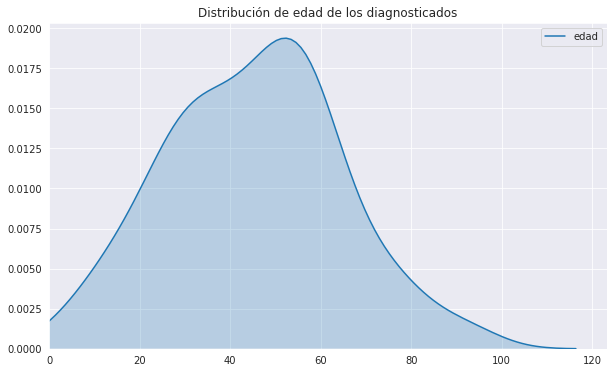

In [11]:
plt.figure(figsize=(10,6))
plt.title("Distribución de edad de los diagnosticados")
sns.kdeplot(data=data['edad'], shade=True).set(xlim=(0))
plt.show()

#### Distribución por género

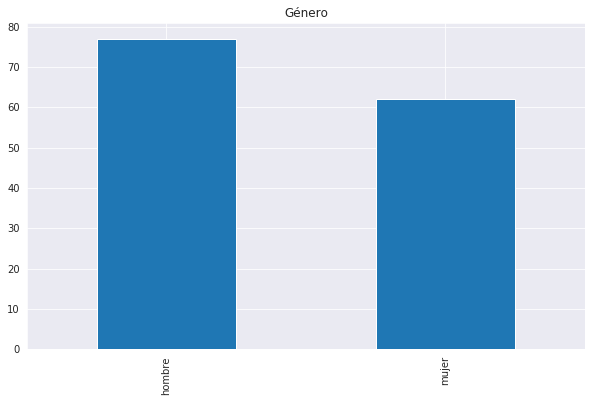

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Género')
data.sexo.value_counts().plot.bar();

#### Distribución por edad y género

In [13]:
male_age = data[data.sexo=='hombre']
female_age = data[data.sexo=='mujer']

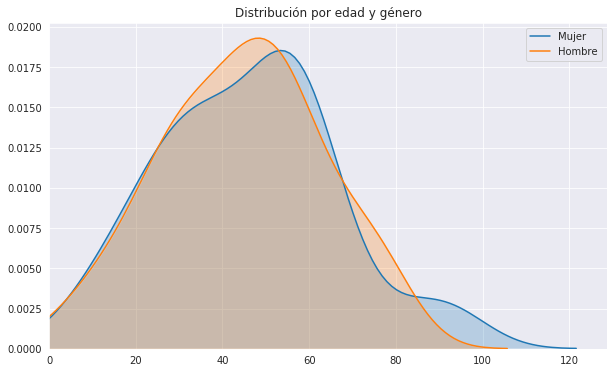

In [14]:
plt.figure(figsize=(10,6))
plt.title("Distribución por edad y género")
sns.kdeplot(data=female_age['edad'], label="Mujer", shade=True).set(xlim=(0))
sns.kdeplot(data=male_age['edad'],label="Hombre", shade=True).set(xlim=(0))
plt.show()

### Cantidad de diagnosticados e ingresados por riesgo

In [15]:
cant_diagnosticados = []
cant_riesgo = []

for k in range(1, len(data_json['casos']['dias'].keys())+1):
    try: 
        cant_diagnosticados.append(len(data_json['casos']['dias'][str(k)]['diagnosticados']))
    except: 
        cant_diagnosticados.append(0)

    try:
        cant_riesgo.append(data_json['casos']['dias'][str(k)]['sujetos_riesgo'])
    except:
        cant_riesgo.append(0)

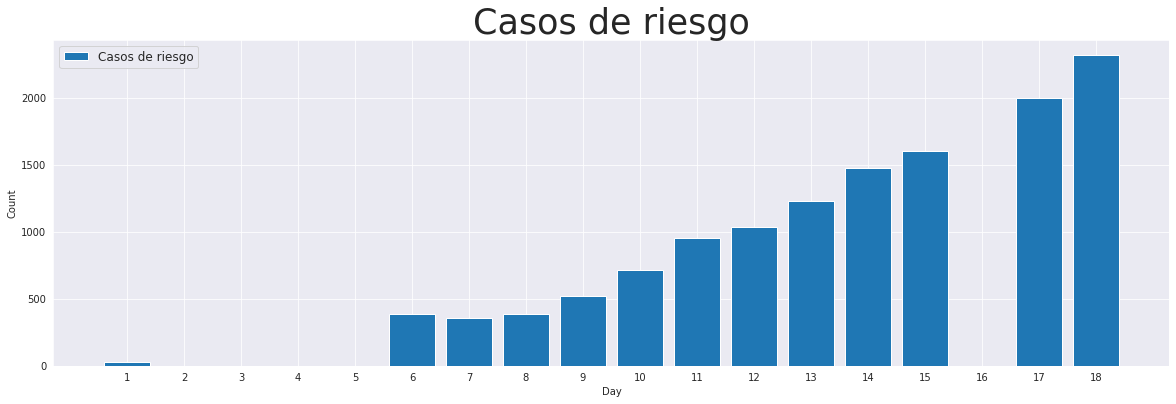

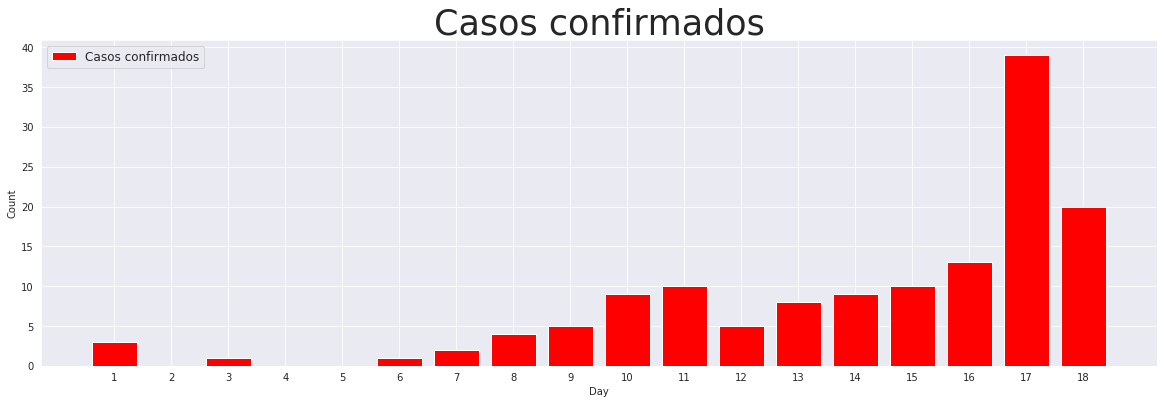

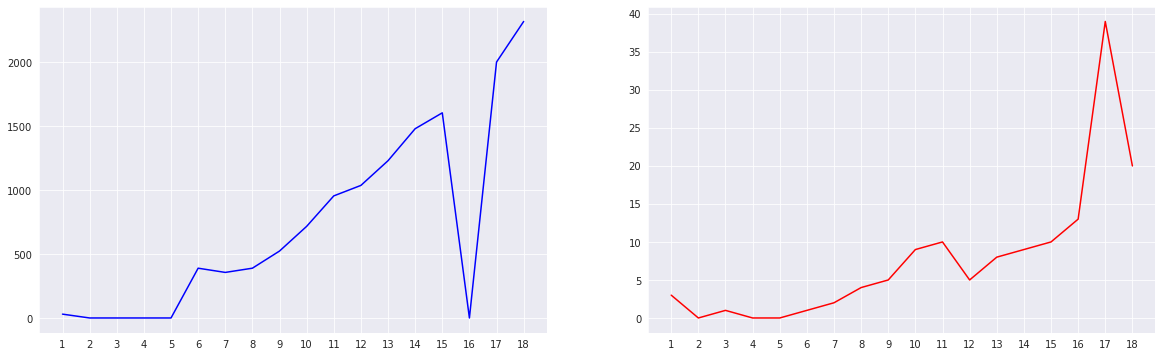

In [16]:
# Casos de riesgo
plt.figure(figsize=(20, 6))
plt.bar([str(i) for i in range(1,len(cant_riesgo)+1)], cant_riesgo,label="Casos de riesgo")
plt.xlabel('Day')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Casos de riesgo',fontsize = 35)
plt.show()

# Casos confirmados
plt.figure(figsize=(20, 6))
plt.bar([str(i) for i in range(1,len(cant_diagnosticados)+1)], cant_diagnosticados,label="Casos confirmados", color='red')
plt.xlabel('Day')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Casos confirmados',fontsize = 35)
plt.show()

# Plot Compare
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.plot([str(i) for i in range(1,len(cant_riesgo)+1)], cant_riesgo, zorder=1,color="blue")
ax2.plot([str(i) for i in range(1,len(cant_diagnosticados)+1)], cant_diagnosticados, zorder=1,color="red")
plt.show()

### Casos por provincias

In [17]:
from collections import defaultdict

In [18]:
locations = defaultdict(int) 

for l in data.provincia_detección:
    locations[l] += 1

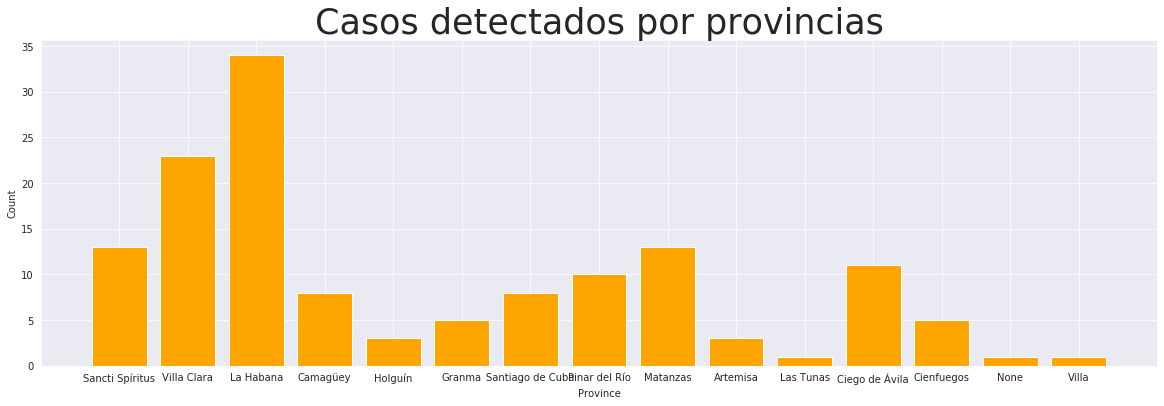

In [19]:
# Casos detectados por provincias
plt.figure(figsize=(20, 6))
plt.bar([str(l) for l in locations], [locations[l] for l in locations], color='orange')
plt.xlabel('Province')
plt.ylabel("Count")
plt.title('Casos detectados por provincias',fontsize = 35)
plt.show()

### Tipo de contagio

In [20]:
contagio = defaultdict(int) 

for c in data.contagio:
    contagio[c] += 1

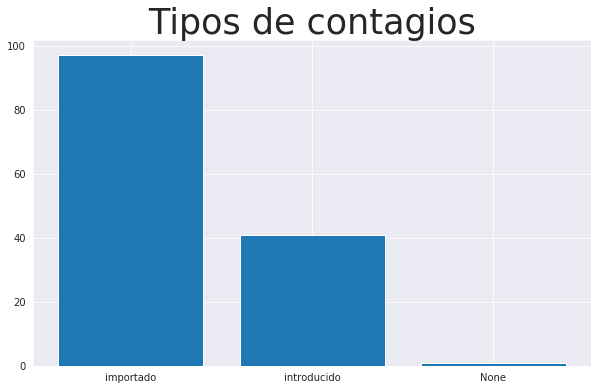

In [21]:
plt.figure(figsize=(10, 6))
plt.bar([str(c) for c in contagio], [contagio[c] for c in contagio])
plt.title('Tipos de contagios',fontsize = 35)
plt.show()

In [22]:
procedencia = defaultdict(int)

for pl in data.posible_procedencia_contagio:
    for p in pl:
        procedencia[p] += 1

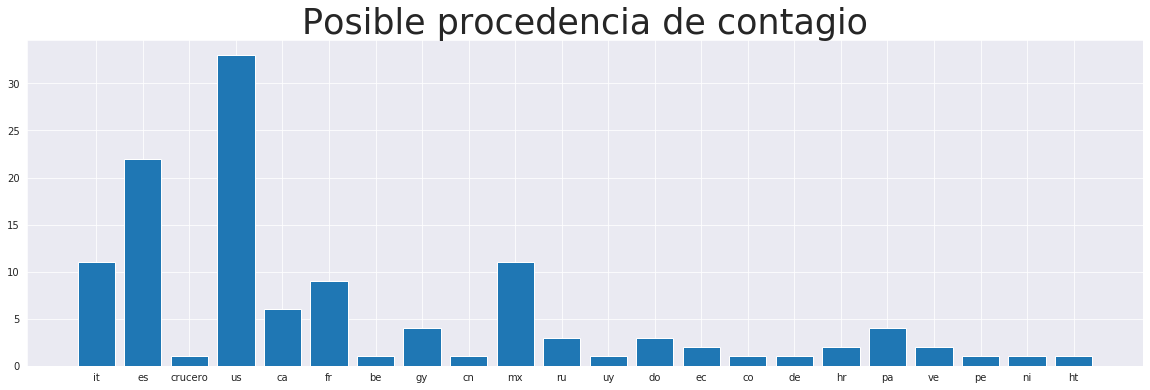

In [23]:
plt.figure(figsize=(20,6))
plt.bar([str(p) for p in procedencia], [procedencia[p] for p in procedencia])
plt.title('Posible procedencia de contagio',fontsize = 35)
plt.show()

### Casos detectados (frecuencia acumulada)

In [24]:
acDetectados = []

for i, c in enumerate(cant_diagnosticados):
    if i == 0:
        acDetectados.append(c)
    else:
        acDetectados.append(c+acDetectados[-1])

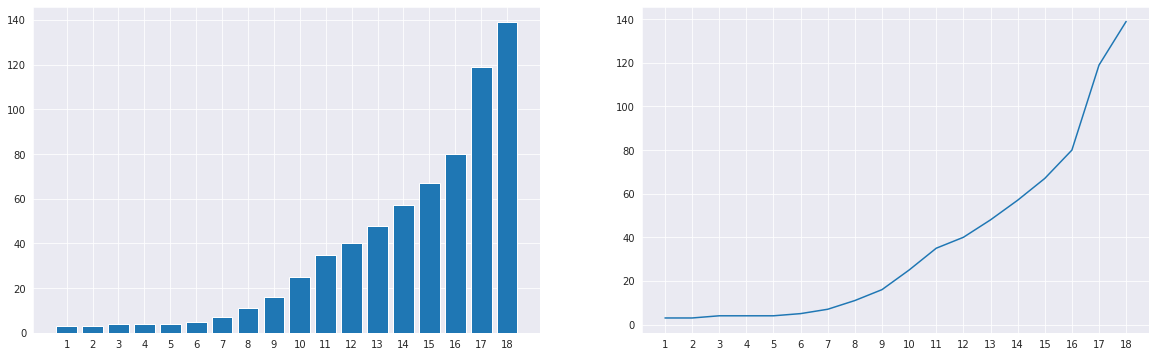

In [25]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.bar([str(i) for i in range(1, len(acDetectados)+1)],acDetectados)
ax2.plot([str(i) for i in range(1, len(acDetectados)+1)],acDetectados)
plt.show()

### Casos de riesgo (frecuencia acumulada)

In [26]:
acRiesgo = []

for i, c in enumerate(cant_riesgo):
    if i == 0:
        acRiesgo.append(c)
    else:
        acRiesgo.append(c+acRiesgo[-1])

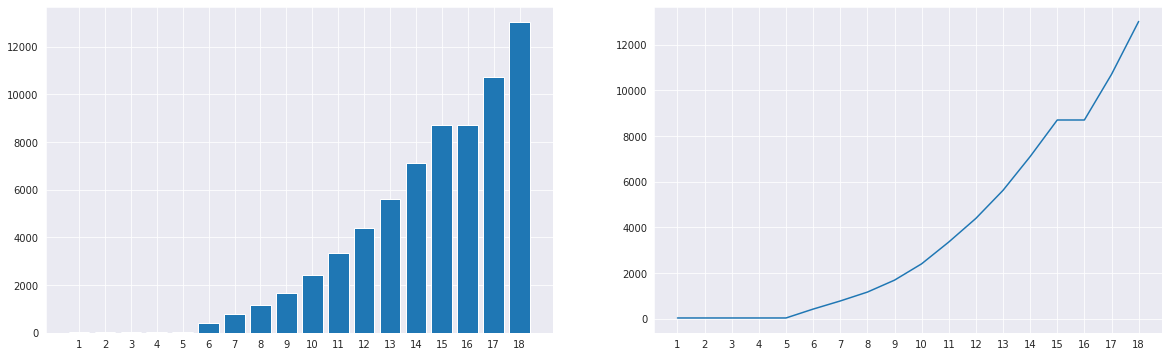

In [27]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.bar([str(i) for i in range(1, len(acRiesgo)+1)],acRiesgo)
ax2.plot([str(i) for i in range(1, len(acRiesgo)+1)],acRiesgo)
plt.show()

### Test realizados vs Casos Detectados (a partir del día 12)

In [28]:
cant_tests = []

for k in range(12, len(data_json['casos']['dias'].keys())+1):
    cant_tests.append(data_json['casos']['dias'][str(k)]['tests_total'])

In [29]:
prop_test_vs_detected = []
detected_acc = []

for i, c in enumerate(cant_tests):
    detected_acc.append(sum(cant_diagnosticados[:11+i]))
    prop_test_vs_detected.append(round(detected_acc[-1] / c, 2))

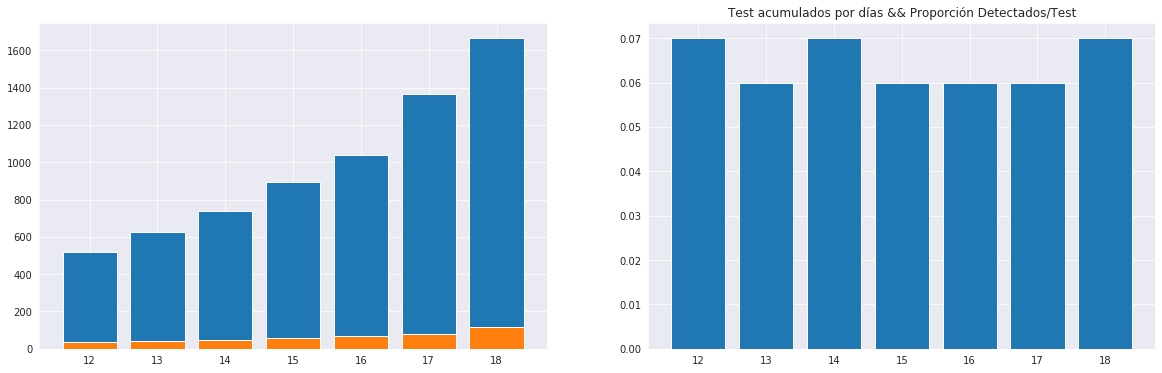

In [30]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

# Test realizados
ax1.bar([str(k) for k in range(12, len(data_json['casos']['dias'].keys())+1)], cant_tests)
ax1.bar([str(k) for k in range(12, len(data_json['casos']['dias'].keys())+1)], detected_acc)

# Proporción entre casos confirmados y test realizados
ax2.bar([str(k) for k in range(12, len(data_json['casos']['dias'].keys())+1)], prop_test_vs_detected) 

plt.title('Test acumulados por días && Proporción Detectados/Test')
plt.show()